# Simple Moving Average Crossover Strategy

This notebook shows how the simple moving average (SMA) crossover strategy is implemented, using Python. The stock of choice is Amazon Inc. The data was extracted from Yahoo Finance.

Let's have a first look at our data.

In [1]:
# LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
pd.options.mode.chained_assignment = None

# DATAFRAME
df = pd.read_csv('AMZN.csv').drop(['Open','High','Low','Close','Volume'],axis=1)
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d',errors='coerce')
periods = df.shape[0]

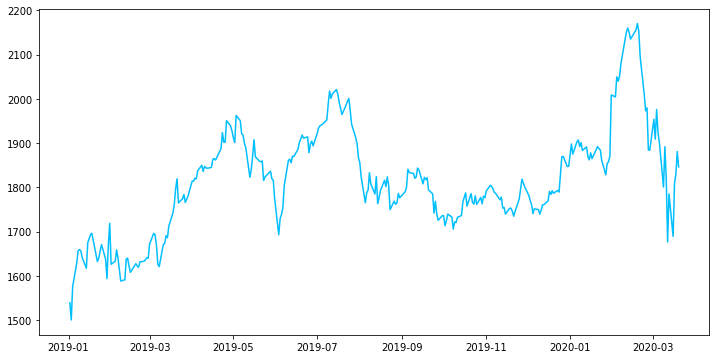

In [2]:
# PLOT
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Adj Close'],color='DeepSkyBlue')
plt.show()

We are going to decide the numbers of periods we want for long-term and short-term moving averages. These periods are selected based on the investor's point of view and preference. In common practice; 20, 50, 100 and 200-day periods are usually used.

Now we can implement the strategies.

## SMA

In [3]:
longterm = 50
shortterm = 30

In [4]:
sma = df.copy()

def sma_strategy(sma,longterm,shortterm):
    sma['Shortterm'] = np.nan
    sma['Longterm'] = np.nan
    sma['L>S'] = np.nan
    sma['Decision'] = np.nan
    for period in range(periods - 1 - longterm):    
        sma['Shortterm'][period + longterm] = sma['Adj Close'][period + longterm - shortterm:period + longterm].mean()
        sma['Longterm'][period + longterm] = sma['Adj Close'][period:period + longterm].mean()

        difference = sma['Longterm'][period + longterm] - sma['Shortterm'][period + longterm]
        sma['L>S'][period + longterm] = 1 if difference >= 0 else 0

        decision = sma['L>S'][period + longterm] - sma['L>S'][period + longterm - 1]
        sma['Decision'][period + longterm] = 'BUY' if decision == 1 else 'SELL' if decision == -1 else np.nan

sma_strategy(sma,longterm,shortterm)

def decision_table(sma):
    return sma[['Date','Adj Close','Decision']][sma['Decision'].isna() == False]
decision_table(sma)

,Date,Adj Close,Decision
51,2019-03-18,1742.150024,BUY
54,2019-03-21,1819.260010,SELL
110,2019-06-11,1863.699951,BUY
132,2019-07-12,2011.000000,SELL
159,2019-08-20,1801.380005,BUY
225,2019-11-21,1734.709961,SELL
244,2019-12-19,1792.280029,BUY
251,2019-12-31,1847.839966,SELL


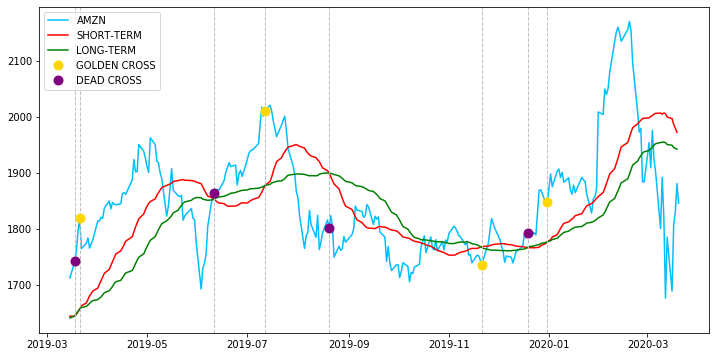

In [5]:
# PLOT
def sma_visualization(sma,decision_table):
    plt.figure(figsize=(12,6))
    plt.plot(sma['Date'][longterm:],sma['Adj Close'][longterm:],color='DeepSkyBlue',label='AMZN')
    plt.plot(sma['Date'][longterm:],sma['Shortterm'][longterm:],color='red',label='SHORT-TERM')
    plt.plot(sma['Date'][longterm:],sma['Longterm'][longterm:],color='green',label='LONG-TERM')
    for day in decision_table['Date']:
        plt.axvline(day,color='silver',linewidth=1,linestyle='--')
    plt.plot(sma[sma['Decision'] == 'SELL']['Date'],
             sma[sma['Decision'] == 'SELL']['Adj Close'],
             marker='o',markerfacecolor='gold',markersize=10,markeredgewidth=0,linewidth=0,label='GOLDEN CROSS')
    plt.plot(sma[sma['Decision'] == 'BUY']['Date'],
             sma[sma['Decision'] == 'BUY']['Adj Close'],
             marker='o',markerfacecolor='purple',markersize=10,markeredgewidth=0,linewidth=0,label='DEAD CROSS')
    plt.legend(loc='upper left')
    plt.show()
sma_visualization(sma,decision_table(sma))

### Explanation:

A column L>S (long-term average > short-term average) is used in our dataframe to track the signals. If long is greater than short, we assign value 1, and 0 otherwise. Decisions are made as follows:

|L>S|Case 1|Case 2|
|-|-|-|
|Period 0|1|0|
|Period 1|0|1|
|Difference|-1|1|
|Decision|Sell|Buy|

Whenever there is a change in the long-term average and short-term average's relative positions, there is a crossover. If the difference is 0, there is no signal. The strategy is illustrated in the chart above.

**Let's see how the result changes in another case, with different long and short-term periods.**

In [6]:
longterm = 200
shortterm = 50

In [7]:
sma_strategy(sma,longterm,shortterm)
decision_table(sma)

,Date,Adj Close,Decision
276,2020-02-06,2050.22998,SELL


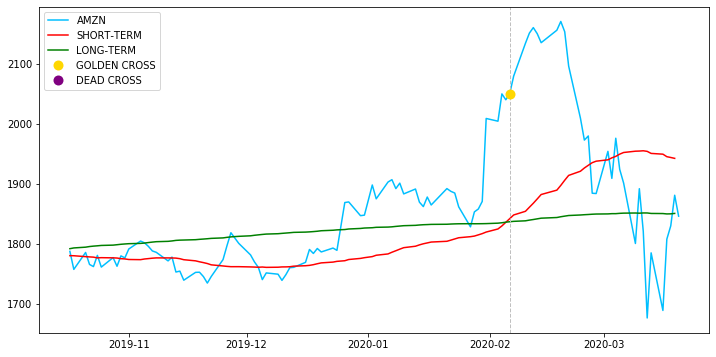

In [8]:
sma_visualization(sma,decision_table(sma))

With their chosen periods, investors might then act accordingly to this SMA strategy.

## References
Investopedia 2020. [*Understanding Moving Averages (MA)*](https://www.investopedia.com/terms/m/movingaverage.asp).